<a href="https://colab.research.google.com/github/sclaudiobr/covid2019/blob/master/covid19-prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet - previsão de dados com framework prophet

## Formato de dados e colunas
<p> datas (ds)
<p> variável (y)

*por: Claudio R. O da Silva*

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [6]:
import requests
r =requests.get('https://data.brasil.io/dataset/covid19/caso.csv.gz', allow_redirects=True)
open('caso.csv.gz', 'wb').write(r.content)
df = pd.read_csv("caso.csv.gz", compression='gzip')

df.head()
covid = df

In [ ]:
covid.tail()

In [8]:
#covid.rename(columns ={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)
covid.rename(columns ={'date':'Date','state':'Country','deaths':'Deaths','confirmed':'Confirmed'}, inplace=True)

In [9]:
covid.tail()

,Date,Country,city,place_type,Confirmed,Deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1233415,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0
1233416,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0
1233417,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0
1233418,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0
1233419,2020-06-19,SP,Óleo,city,1,0,1,False,2496.0,2471.0,3533809.0,40.46945,0.0


In [11]:
from datetime import datetime as dt

In [12]:
# numero de mortes
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()
mortes['Date'] = pd.to_datetime(mortes['Date'])

In [13]:
confirmados = covid.groupby('Date').sum()['Confirmed'].reset_index()
confirmados.tail()
confirmados['Date'] = pd.to_datetime(confirmados['Date'])

In [14]:
confirmados.columns = ['ds','y']

In [15]:
# tratamento dos dados para o prophet - renomeando
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
307,2020-12-28,352781
308,2020-12-29,348015
309,2020-12-30,299889
310,2020-12-31,264686
311,2021-01-01,196142


In [16]:
confirmados['ds'] = pd.to_datetime(confirmados['ds'])
confirmados.tail()

,ds,y
307,2020-12-28,13567398
308,2020-12-29,13316638
309,2020-12-30,11790716
310,2020-12-31,10650489
311,2021-01-01,7652456


In [17]:
# formatando data
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
307,2020-12-28,352781
308,2020-12-29,348015
309,2020-12-30,299889
310,2020-12-31,264686
311,2021-01-01,196142


In [18]:
dias = 90
m = Prophet(interval_width= 0.95)
m.fit(confirmados)
futuro = m.make_future_dataframe(periods=dias)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# uso do prophet
dias = 30
m = Prophet(interval_width= 0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#futuro.tail(dias)

In [19]:
previsao = m.predict(futuro)
#previsao.tail(dias)

In [20]:
previsao[['ds', 'yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
312,2021-01-02,1.229635e+07,1.343070e+07,1.459791e+07
313,2021-01-03,1.238623e+07,1.357309e+07,1.464892e+07
314,2021-01-04,1.252221e+07,1.364248e+07,1.472308e+07
315,2021-01-05,1.259831e+07,1.378569e+07,1.493469e+07
316,2021-01-06,1.251041e+07,1.372674e+07,1.473251e+07
...,...,...,...,...
397,2021-03-28,1.566314e+07,1.747404e+07,1.934595e+07
398,2021-03-29,1.560022e+07,1.754343e+07,1.937733e+07
399,2021-03-30,1.585797e+07,1.768664e+07,1.952696e+07
400,2021-03-31,1.584091e+07,1.762768e+07,1.964370e+07


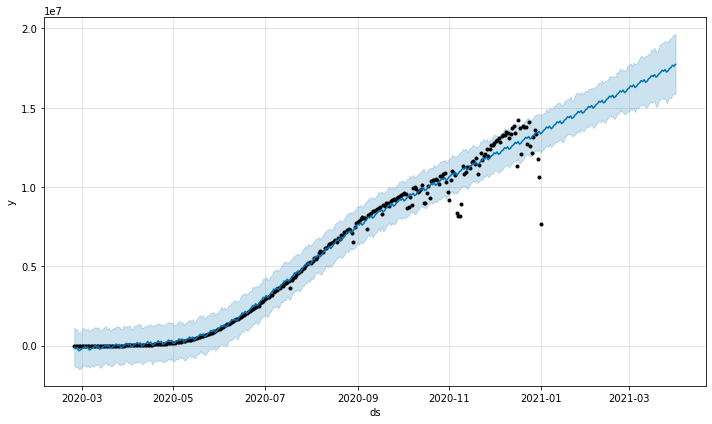

In [21]:
confirmed_forecast_plot = m.plot(previsao)

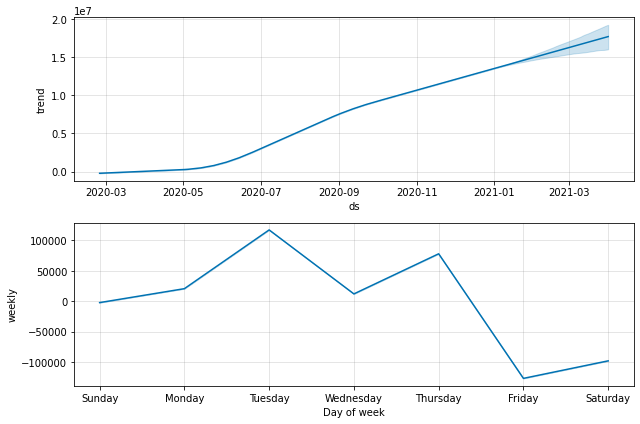

In [22]:
fig2 = m.plot_components(previsao)